Sergio Daza Vasquez - 1010082612

Punto 4)

Text(0, 0.5, 'Amplitud')

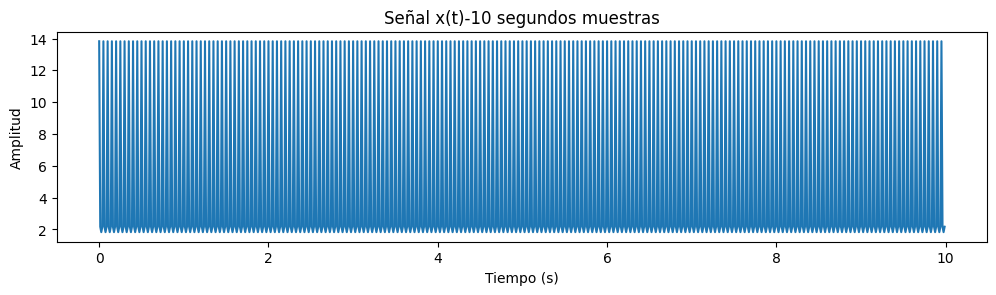

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fs = 80  #fs justifiacada en la hoja
t = np.linspace(0, 10, 10 * fs, endpoint=False)  #los 10 segundos

x_t = 4 * np.sin(80 * np.pi * t + np.pi / 4) + 6 * np.cos(40 * np.pi * t) + 5

X_f = np.fft.fft(x_t)  #Fourier
frequencies = np.fft.fftfreq(len(t), d=1/fs)  #frec asociadas

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x_t)
plt.title("Señal x(t)-10 segundos muestras")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")


Punto 5

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def periodograma_welch(x, M, S, w):
    #A)
    N = len(x)
    step = M - S#paso
    num_segments = (N - S) // step
    segments = [x[i:i+M] for i in range(0, N - M + 1, step)]

    #B)
    Pxx_segments = []
    for segment in segments:
        if len(segment) < M:
            segment = np.pad(segment, (0, M - len(segment)))
        segment_windowed = segment * w#enventaneo
        fft_segment = np.fft.fft(segment_windowed, n=M)
        Pxx_segment = (1 / (M * np.sum(w**2))) * np.abs(fft_segment[:M//2+1])**2
        Pxx_segments.append(Pxx_segment)

    #C y D)
    Pxx = np.mean(Pxx_segments, axis=0)

    f = np.fft.fftfreq(M, d=1)[:M//2+1]

    return f, Pxx


Verificacion rutina

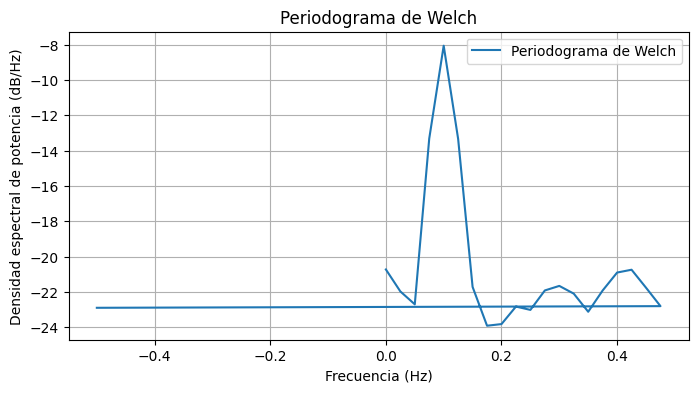

In [13]:
np.random.seed(0)  #semilla para reproducibilidad
N = 500
fs = 100
t = np.arange(N) / fs
x = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.normal(size=N)

M = 40
S = 25
w = np.hanning(M)

#uso rutina
f, Pxx = periodograma_welch(x, M, S, w)

plt.figure(figsize=(8, 4))
plt.plot(f, 10 * np.log10(Pxx), label="Periodograma de Welch")
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.grid()
plt.legend()
plt.show()
